In [89]:
# import packages that we'll need

# library for data manipulation and analysis (especially data frames)
import pandas as pd
# library adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions 
import numpy as np
# library for visualisation
import matplotlib.pyplot as plt

# Aufgabe 1:

In [90]:
#1. Familiarise yourself with the data set. Count how many people embarked from each city using the .value_counts() command.
df = pd.read_csv("input/titanic_data.csv", sep=",", index_col=0)
df["embarked"].value_counts()

embarked
Southampton    174
Cherbourg       58
Queenstown      18
Name: count, dtype: int64

<Axes: xlabel='pclass'>

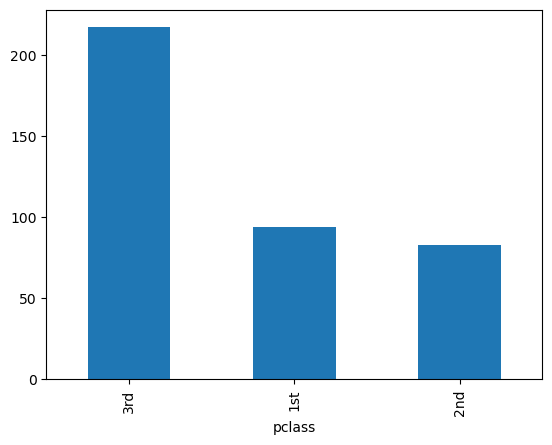

In [91]:
#2. Create a barplot that shows how many people were in each class ( pclass ). Include the bar chart in your pdf. 
df["pclass"].value_counts().plot(kind="bar")

In [92]:
#3. Select the first 15 rows and save them as a data frame named df_subset. Copy the resulting table in your submission pdf.
df_subset = df.head(15).copy()
df_subset

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
703,704,3rd,0,"Cann, Mr Ernest",21.0,Southampton,NaN,NaN,NaN,NaN,male
260,261,1st,1,"Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)",NaN,Southampton,"London / East Orange, NJ",C-126,NaN,5,female
153,154,1st,0,"Kent, Mr Edward Austin",58.0,Cherbourg,"Buffalo, NY",NaN,NaN,(258),male
606,607,3rd,1,"Abelseth, Miss Anna Karen",16.0,Southampton,"Norway Los Angeles, CA",NaN,NaN,16,female
448,449,2nd,0,"Hold, Mr Stephen",42.0,Southampton,"England / Sacramento, CA",NaN,NaN,NaN,male
440,441,2nd,0,"Hickman, Mr Lewis",32.0,Southampton,"West Hampstead, London / Neepawa, MB",NaN,NaN,NaN,male
517,518,2nd,0,"Norman, Mr Robert Douglas",NaN,Southampton,Glasgow,NaN,NaN,(287),male
933,934,3rd,1,"Kink, Miss Louise Gretchen",NaN,NaN,NaN,NaN,NaN,NaN,female
1276,1277,3rd,0,"Van Impe, Miss Catharine",NaN,NaN,NaN,NaN,NaN,NaN,female
487,488,2nd,0,"Mack, Mrs Mary",57.0,Southampton,"Southampton / New York, NY",E77,NaN,(52),female


In [93]:
#4. Draw a decision tree for df_subset using pclass, age, embarked, home.dest, and sex as features, and survived as the target variable.

for col in ['pclass', 'age', 'embarked', 'home.dest', 'sex', 'name','room','ticket','boat']:
    df_subset[col] = df_subset[col].astype('category')

cat_columns = df_subset.select_dtypes(['category']).columns
df_subset[cat_columns] = df_subset[cat_columns].apply(lambda x: x.cat.codes)

df_subset.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
703,704,2,0,3,1,2,-1,-1,-1,-1,1
260,261,0,1,12,-1,2,6,0,-1,5,0
153,154,0,0,7,7,0,1,-1,-1,0,1
606,607,2,1,0,0,2,7,-1,-1,4,0
448,449,1,0,5,5,2,2,-1,-1,-1,1


# Aufgabe 2:

In [94]:
from sklearn import tree

[Text(0.6801948051948052, 0.975, 'x[8] <= 20.5\ngini = 0.449\nsamples = 394\nvalue = [260, 134]'),
 Text(0.4642857142857143, 0.925, 'x[4] <= 0.5\ngini = 0.245\nsamples = 301\nvalue = [258, 43]'),
 Text(0.21428571428571427, 0.875, 'x[0] <= 1.5\ngini = 0.488\nsamples = 83\nvalue = [48, 35]'),
 Text(0.07792207792207792, 0.825, 'x[1] <= 33.0\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(0.05194805194805195, 0.775, 'x[5] <= 13.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.025974025974025976, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07792207792207792, 0.725, 'x[5] <= 316.0\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.05194805194805195, 0.675, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.1038961038961039, 0.675, 'x[5] <= 350.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.07792207792207792, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12987012987012986, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.10

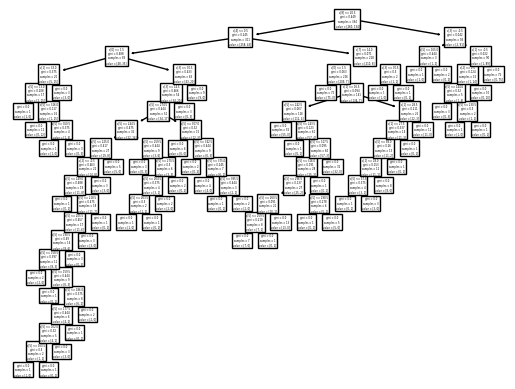

In [107]:
df_new = df.copy()
for col in ["pclass", "age", "embarked", "home.dest", "sex", "name", "room", "ticket", "boat"]:
    df_new[col] = df_new[col].astype('category')

cat_columns2 = df_new.select_dtypes(['category']).columns
df_new[cat_columns2] = df_new[cat_columns2].apply(lambda x: x.cat.codes)

feature_cols2 = ["pclass", "age", "embarked", "home.dest", "sex", "name", "room", "ticket", "boat"]

features2 = df_new[feature_cols2]
target2 = df_new.survived

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(features2, target2)

tree.plot_tree(clf2)

In [108]:
import graphviz
import pydotplus

In [115]:
dot_data = tree.export_graphviz(clf2, out_file=None, feature_names=feature_cols2, class_names=target2.astype("str"), filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('output/decisiontree.png')

True